# Data Visualizations

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

In [5]:
trainers = pd.read_csv('../data/final_df.csv')
trainers.columns

Index(['type', 'gender', 'last_type', 'material', 'brand', 'sole_material',
       'lining_material', 'season', 'made_in', 'insole_material', 'name',
       'rating', 'code', 'cmr price', 'event price', 'full price',
       'discipline', 'interior_material'],
      dtype='object')

In [55]:
sns.displot

<function seaborn.distributions.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)>

# Figure Level

Se crean a nivel macro y no se modifican cosas demasiado específica. Permite crear graficos complejos esteticos de forma sencilla.

Vemos que los tenis de moda son los más proveidos por falabella, seguidos de los tenis deportivos. Además, vemos que existen tipos como lo son la sandalias, mocacines y botas que no hacen parte de la categoria a seleccionar (tennis), por lo que deben ser eliminadas.

In [56]:
filtered = trainers[(trainers['type'] == 'Sandalias') | (trainers['type'] == 'Mocasines') | (trainers['type'] == 'Botines') | (trainers['type'] == 'Zapatos Formales') | (trainers['type'] == 'Calzado escolar') | (trainers['type'] == 'Zapatos con luces')]

trainers.drop(filtered.index, inplace=True)

In [57]:
trainers.shape

(3048, 18)

/Users/paulatorres/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


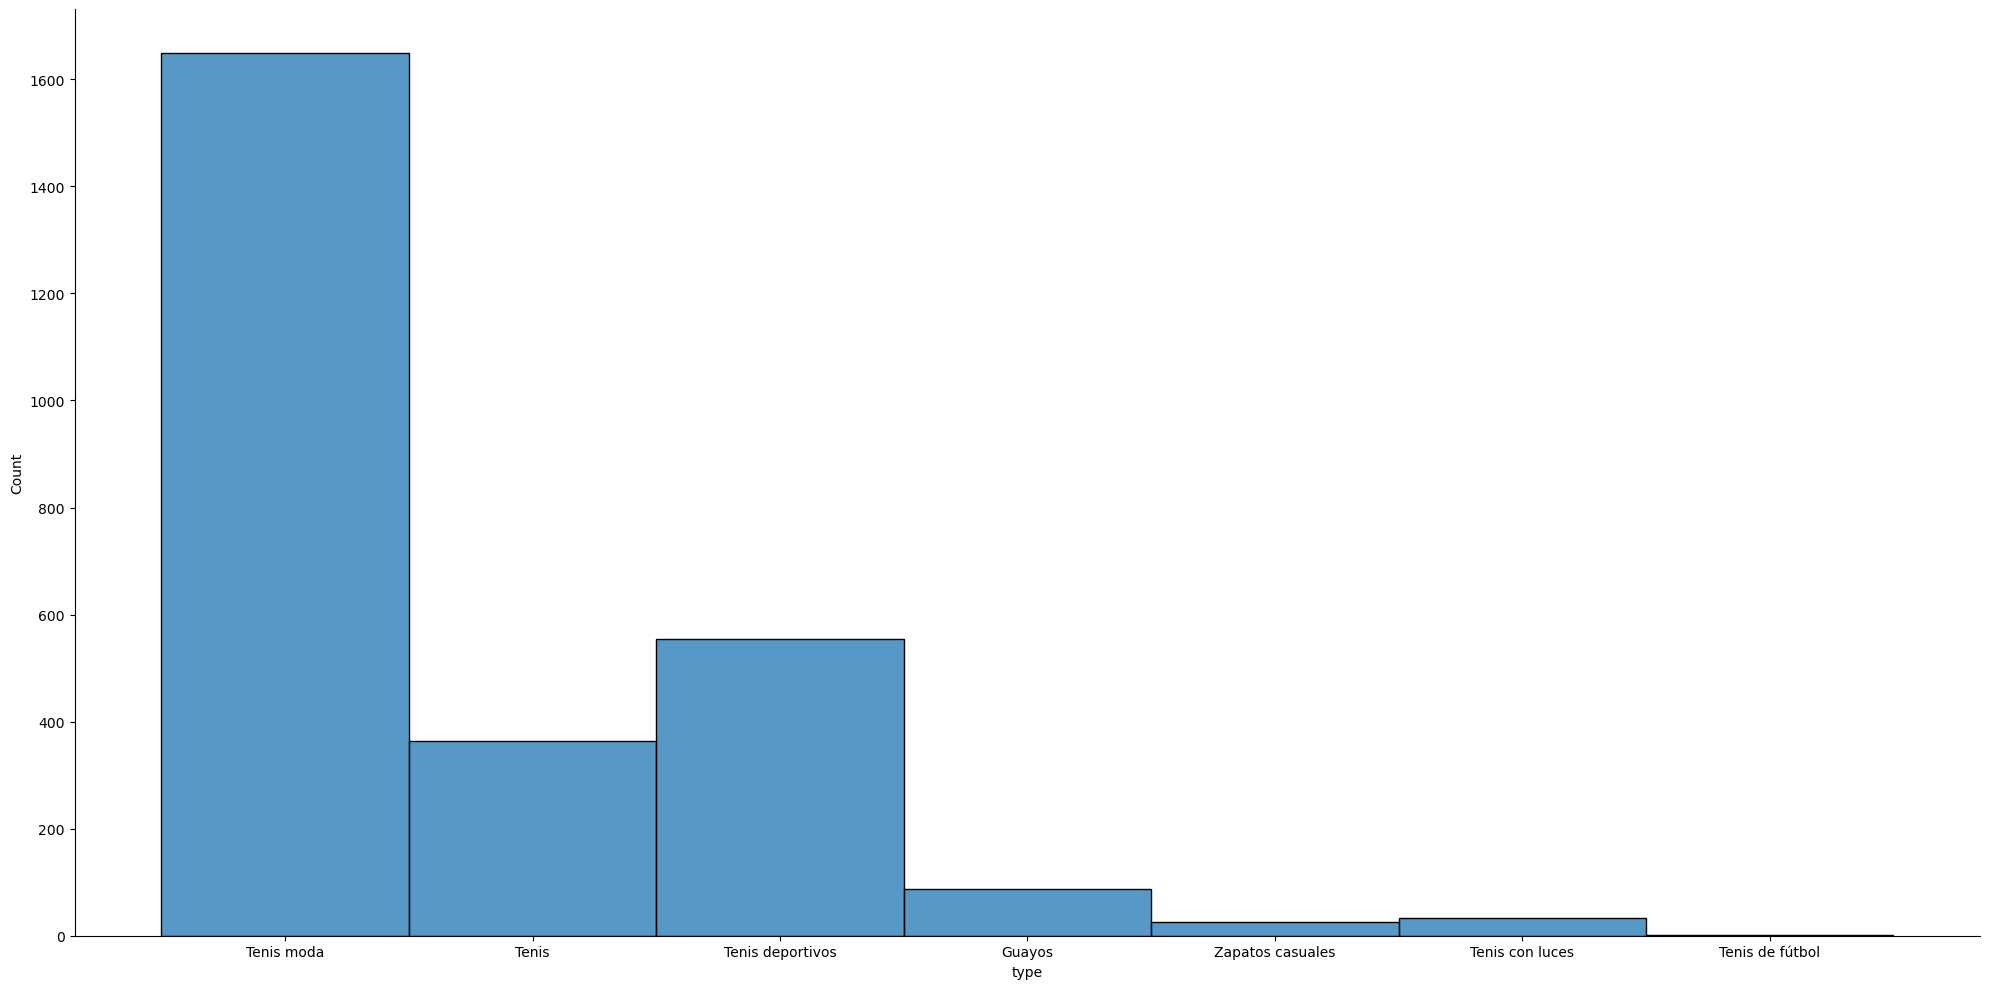

In [58]:
sns.displot(data=trainers, x='type', multiple="stack", height=10, aspect=2)


Evidentemente, los tenis de moda son los más comercializados por falabella, seguidos de los tenis comunes y deportivos.

/Users/paulatorres/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


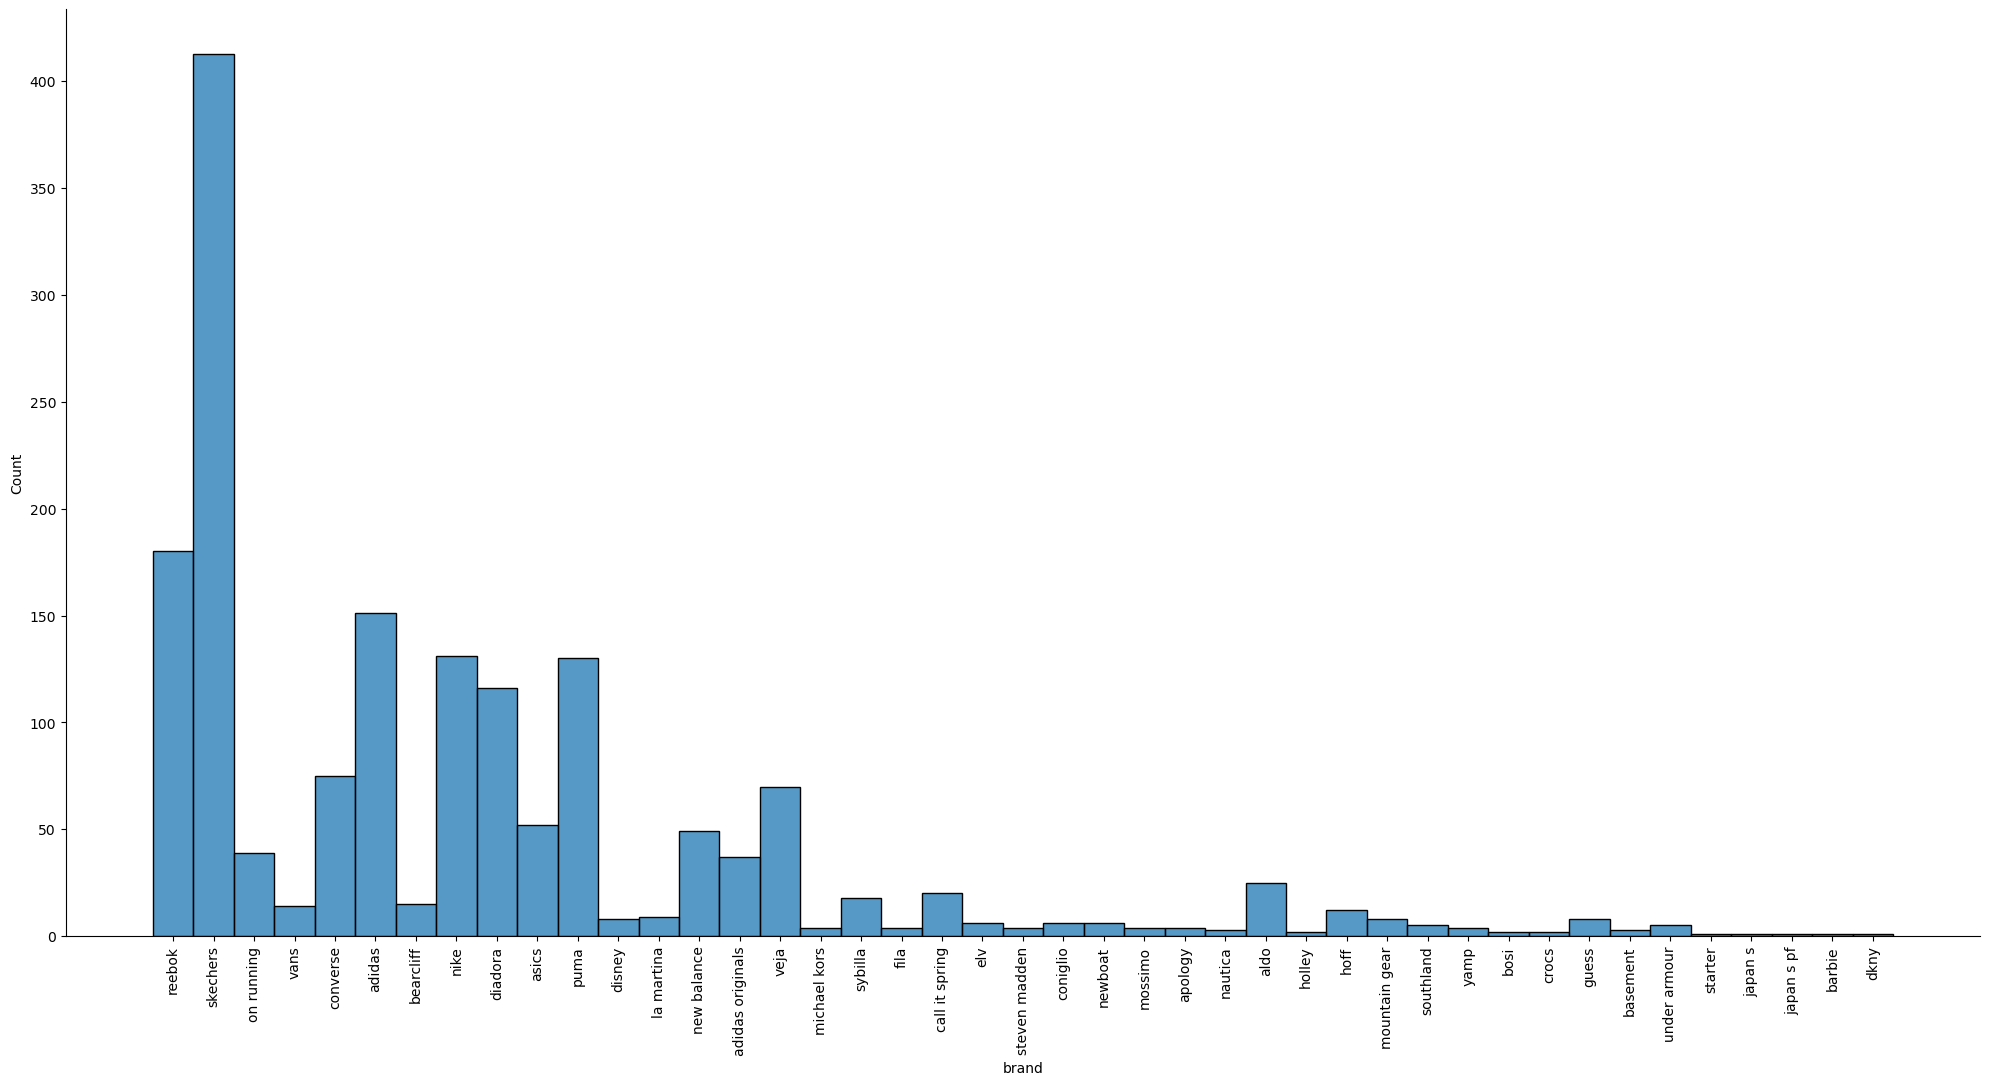

In [73]:
# distribucion de tenis de type Tenis moda por marca
filtered = trainers[(trainers['type'] == 'Tenis moda')]
sns.displot(data=filtered, x='brand', height=10, aspect=2)
plt.xticks(rotation=90)
plt.show()

In [60]:
trainers['gender'] = trainers['gender'].fillna('Unknown')
counts = trainers['gender'].value_counts(normalize=True)
temp = trainers['gender'].apply(lambda x: 'otros' if counts[x] < 0.05 else x)


In [61]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

Exite una mayor comenrcializacion de tenis para adultos que para niños.

In [65]:
trainers['rating'] = trainers['rating'].fillna(0)

/Users/paulatorres/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


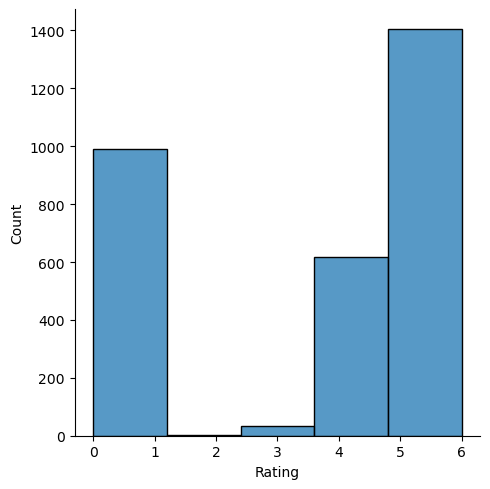

In [ ]:
sns.displot(data=trainers, x='Rating', height=5, aspect=1, binwidth=1.2)


Una buena parte de las personas no rankea los tenis por este medio, sin embargo lo que son calificados en su mayoría obtienen muy buenas calificaciones, esto puede indicar que los productos llegan en buenas condiciones a la ubicación de envio (esto abre las puertas a un posible analisis de comentarios con lenguaje natural)

# Axes level

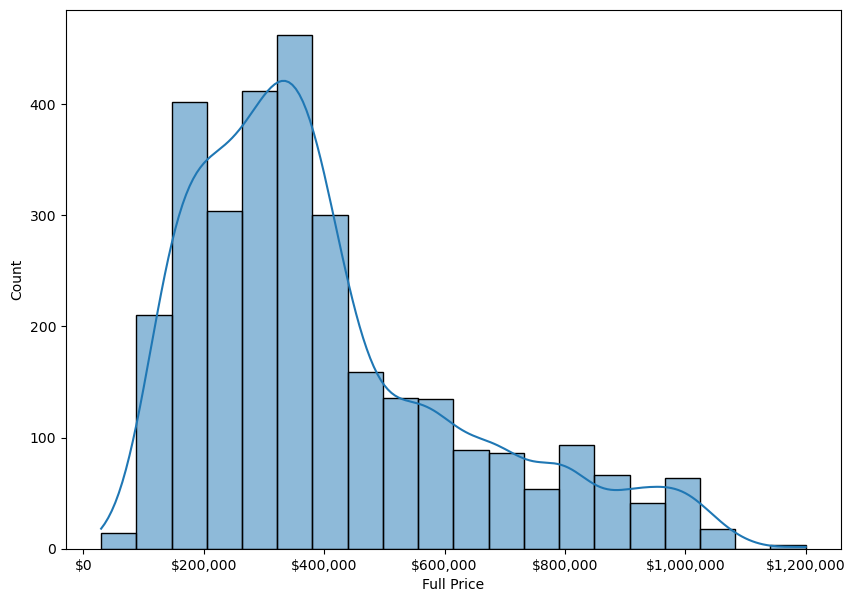

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(trainers['Full Price'], bins=20, kde=True)
# format the x axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

 Parece tener una distribución sesgada hacia la derecha, lo que indica que hay una cantidad menor de zapatillas con precios altos. La mayoría de los precios se concentra entre $100,000 y $500,000, y se puede observar que hay algunos precios que superan el millón de pesos. Esto podría sugerir que la mayoría de las zapatillas son moderadamente asequibles, con algunas excepciones de alto costo.

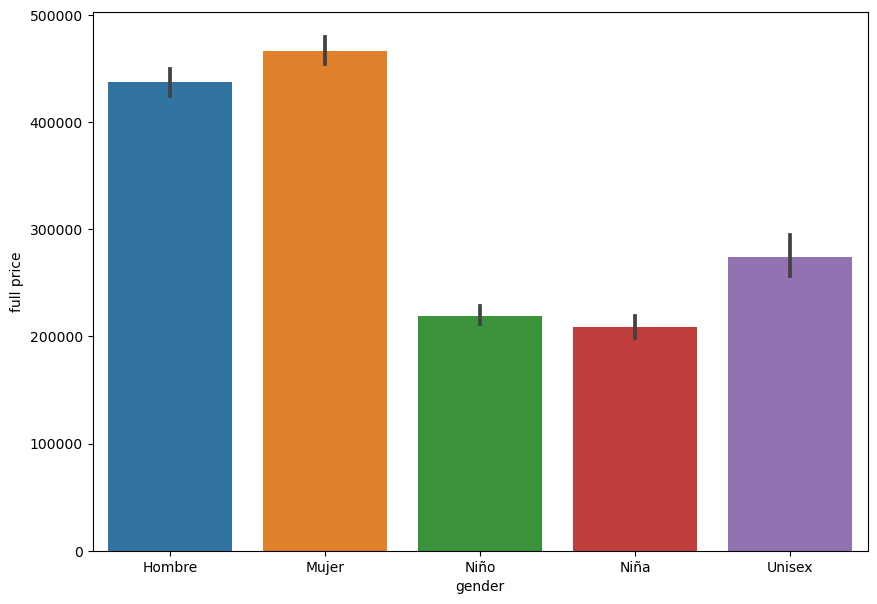

In [77]:
# plot de promedio de precios por genero 
plt.figure(figsize=(10, 7))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
sns.barplot(data=trainers, x= 'gender', y='full price', estimator=np.mean, order=['Hombre', 'Mujer', 'Niño', 'Niña', 'Unisex'])
plt.show()



A simple vista, parece que las zapatillas para hombres y mujeres tienen precios promedio similares y los más altos, seguidos por las categorías unisex, niñas y niños.

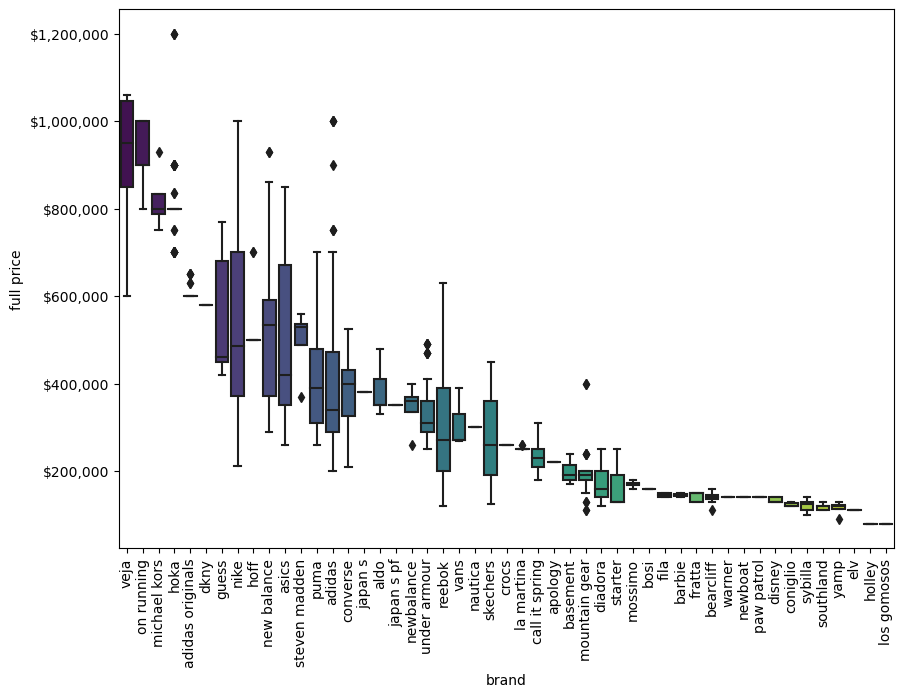

In [72]:
# box plot of the full price of the trainers
plt.figure(figsize=(10, 7))
sns.boxplot(data=trainers, x='brand', y='full price', order=trainers.groupby('brand')['full price'].mean().sort_values(ascending=False).index, palette='viridis')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
plt.xticks(rotation=90)
plt.show()

En el espectro de precios de las zapatillas deportivas, ciertas marcas destacan por ofrecer una gama variada de productos que abarca desde opciones moderadamente accesibles hasta modelos exclusivos de gama alta. Dentro de este grupo, marcas como Guezz, Adidas y Hoff presentan una notable diversidad en su estructura de precios. Es particularmente interesante observar que estas marcas exhiben varios valores atípicos, que aunque parecen ser excepciones en comparación con la mayoría de sus productos, pueden reflejar ofertas especiales o ediciones limitadas que justifican dichos precios.

Por contraste, otras marcas cuyos precios no superan los 400 mil pesos tienden a mostrar una coherencia de precios más uniforme.

([<matplotlib.patches.Wedge at 0x2821b2710>,
 [Text(-0.6030909218520054, 0.9199355085981291, 'No'),
  Text(0.603090921852005, -0.9199355085981294, 'Yes')],
 [Text(-0.32895868464654837, 0.5017830046898886, '68.5%'),
  Text(0.3289586846465481, -0.5017830046898887, '31.5%')])

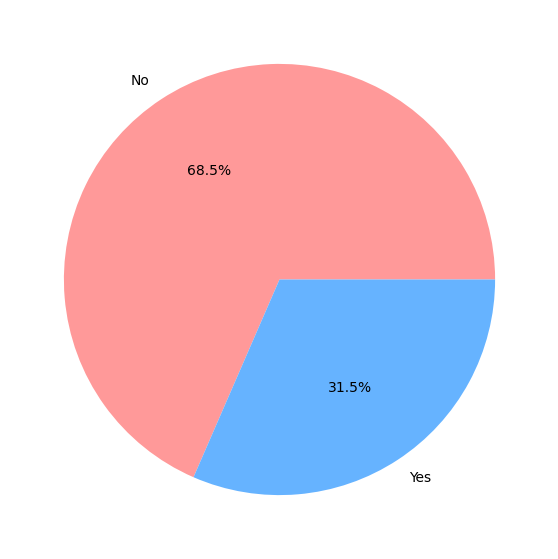

In [ ]:
trainers['is_discounted'] = trainers['Event Price'] < trainers['Full Price']
trainers['is_discounted'].value_counts(normalize=True)

plt.figure(figsize=(7, 7))
plt.pie(trainers['is_discounted'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])


Practica

La mayoria de los tennis no tienen descuento en el precio de venta.

In [4]:
trainers

,type,gender,last_type,material,brand,sole_material,lining_material,season,made_in,insole_material,name,rating,code,cmr price,event price,full price,discipline,interior_material
0,Tenis moda,Niño,Normal,Cuero,reebok,Goma,Textil,Toda temporada,China,Textil,Tenis Reebok Classic para Niño,0.0,72793527,13989.0,15989.0,199900.0,NaN,NaN
1,Tenis moda,Niño,Normal,Cuero,reebok,Goma,Textil,Toda temporada,China,Textil,Tenis Reebok Classic para Niño,0.0,72793543,13989.0,15989.0,199900.0,NaN,NaN
2,Tenis moda,Niño,Normal,Sintético,skechers,Goma,Poliéster,Toda temporada,China,Poliéster,Tenis moda Skechers Bounder Rozerg para Niño,0.0,72882966,NaN,NaN,179990.0,NaN,NaN
3,NaN,Hombre,NaN,Textil,NaN,NaN,NaN,NaN,NaN,NaN,Tenis Hombre Reebok Rider V - Gris-Blanco,0.0,128281449,186459.0,2049.0,272900.0,NaN,NaN
4,NaN,Hombre,NaN,Cuero,NaN,Goma,NaN,NaN,NaN,NaN,Tenis New Balance 515-Verde,5.0,126747483,291191.0,31999.0,359990.0,Outdoor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,Tenis moda,Hombre,Normal,Sintético,new balance,Caucho,Textil,Toda temporada,Vietnam,Textil,Tenis New Balance para Hombre Moda 550,5.0,72735458,NaN,NaN,859990.0,NaN,NaN
3052,Tenis moda,Mujer,Normal,Sintético,skechers,Goma,Poliéster,Toda temporada,China,Poliéster,Tenis Skechers para Mujer Moda Summits Perfect...,0.0,72890296,17999.0,19999.0,279900.0,Lifestyle,NaN
3053,Tenis deportivos,Mujer,Normal,Tela,adidas,Caucho,Textil,Toda temporada,Vietnam,Textil,Tenis Adidas Mujer Cross training Rapidmove Ad...,4.6,72712203,45499.0,51999.0,649950.0,Cross training,NaN
3054,Tenis deportivos,Hombre,Normal,Tela,adidas,Caucho,Textil,Toda temporada,China,Textil,Tenis Adidas para Hombre Running Adizero SL,4.8,72889124,NaN,NaN,699990.0,Running,NaN


In [24]:
trainers[trainers['discipline'] == "Running"].count()

type                 657
gender               763
last_type            704
material             757
brand                657
sole_material        727
lining_material      597
season               657
made_in              657
insole_material      569
name                 764
rating               764
code                 764
cmr price            219
event price          219
full price           764
discipline           764
interior_material    113
dtype: int64

In [6]:
running = trainers[trainers['discipline'] == "Running"]

In [7]:
import plotly.express as px
fig = px.box(running, y="full price")
fig.update_layout(yaxis=dict(tickformat=",.0f"))
fig.show()

In [9]:
import plotly.figure_factory as ff
fig = ff.create_distplot(hist_data=[running["full price"]], group_labels=['Full Price'])
fig.show()